# Exploring Thomas Fire Using California Fire Perimeter data from data.gov

**Author**: Kat Le

**Github Repository**: https://github.com/katleyq/eds220-hwk4

California Fire Perimeter source: https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436


### Import libraries and load data

In [2]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import box  # To create polygon bounding box

"""
Set environment variable 'PROJ_LIB' to specify the path for the PROJ library
Resolves ERROR 1: PROJ: proj_create_from_database
"""""
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

pd.set_option("display.max.columns", None)

In [3]:
# Create path to repository data folder
data_folder_fp = os.path.join(#'/',
                              #'Users',
                              #'katherine', 
                              #'MEDS',
                              #'EDS-220',
                              #'eds220-hwk4',
                              'data')

# Load California Fire Perimeter shapefile
df = gpd.read_file(f"{data_folder_fp}/California_Fire_Perimeters/California_Fire_Perimeters.shp")

### Fire Perimeter Data Exploration


In [5]:
df.head()

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
2654,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,9,7,1,281791.0,CONT_DATE based on Inciweb,None,None,None,None,2010,"MULTIPOLYGON (((-13316089.016 4088553.040, -13..."


In [6]:
df.crs

<Projected CRS: PROJCS["WGS_1984_Web_Mercator_Auxiliary_Sphere",GE ...>
Name: WGS_1984_Web_Mercator_Auxiliary_Sphere
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Thomas Fire Boundary

In [4]:
thomas_fire = df.loc[(df['FIRE_NAME'] == 'THOMAS') & (df['YEAR_'] == 2017)]

<Axes: >

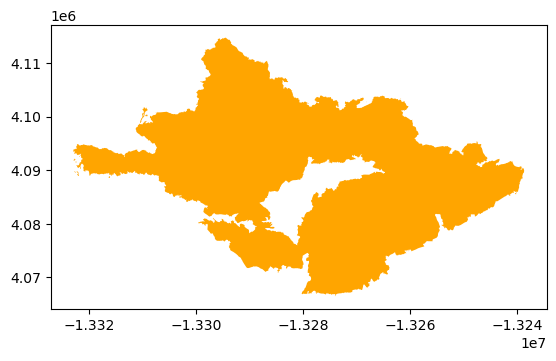

In [6]:
thomas_fire.plot(color = 'orange')

In [7]:
thomas_fire

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
2654,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,9,7,1,281791.0,CONT_DATE based on Inciweb,None,None,None,None,2010,"MULTIPOLYGON (((-13316089.016 4088553.040, -13..."


In [8]:
# Save file to data folder
# thomas_fire.to_file('data/thomas_fire.geojson', driver = 'GeoJSON')
thomas_fire.to_file('data/thomas_fire.shp')

I decided to save the Thomas Fire Boundary as a GeoJSON because this file format produces less files than shapefiles.